This demo show the Variational Gaussian HMM using the example in the paper by McGregory and Titterington, 

In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.mixture
import matplotlib.gridspec as gs
import sklearn.utils
import seaborn as sns
import scipy.stats

In [50]:
import hmmlearn.hmm

In [3]:
pd.options.display.float_format = "{:.4}".format

In [4]:
sys.path.insert(0, "..")

In [5]:
from hmm import GaussianVariationalHMM, GaussianHMM, plots


In [6]:
print(GaussianVariationalHMM)

<module 'hmm.GaussianVariationalHMM' from '../hmm/GaussianVariationalHMM.py'>


In [12]:
from hmm.datasets.basic import load_old_faithful_duration, load_old_faithful_waiting
from hmm.datasets.synthetic import get_gaussian_mcgrory_and_titterington_sequences

In [13]:
observed, hidden = get_gaussian_mcgrory_and_titterington_sequences(1, 500, None)

In [14]:
mixed = sklearn.mixture.BayesianGaussianMixture(n_components=6)

In [15]:
mixed.fit(observed.ravel().reshape(-1, 1))

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=6, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [16]:
mixed.means_

array([[ 1.51608311],
       [-1.49923182],
       [ 2.98257955],
       [ 0.0192555 ],
       [ 0.80729009],
       [ 0.80729264]])

In [17]:
mixed.covariances_

array([[[0.0855349 ]],

       [[0.13596135]],

       [[0.12102496]],

       [[0.07961803]],

       [[2.8165737 ]],

       [[2.81684808]]])

In [18]:
mixed.mean_prior_

array([0.80729265])

In [19]:
mixed.covariance_prior_

array([[2.81684876]])

In [20]:
mixed.degrees_of_freedom_prior_

1

In [21]:
informed_estimator = GaussianVariationalHMM.GaussianVariationalHMM(
    n_components=6, 
    n_iterations=500, 
    n_inits=5,
    tol=1e-10,
    means_prior="data",
    variances_prior=(1.0, 2.8134))

In [22]:
informed_estimator.fit(observed)

GaussianVariationalHMM(A_prior=None, implementation='scaling',
            means_prior='data', n_components=6, n_inits=5,
            n_iterations=500, n_jobs=-1, pi_prior=None, random_state=None,
            tol=1e-10, variances_prior=(1.0, 2.8134), verbose=0)

In [23]:
informed_estimator.gamma_prior_

array([1., 1., 1., 1., 1., 1.])

In [24]:
informed_estimator.delta_prior_ / informed_estimator.gamma_prior_

array([2.8134, 2.8134, 2.8134, 2.8134, 2.8134, 2.8134])

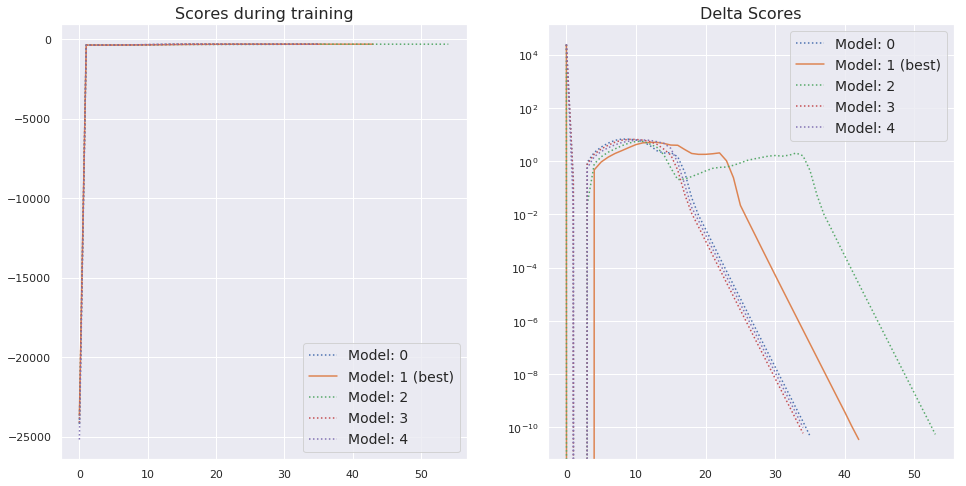

In [26]:
_ = plots.multiple_learning_plot(informed_estimator.explored_lower_bounds_)

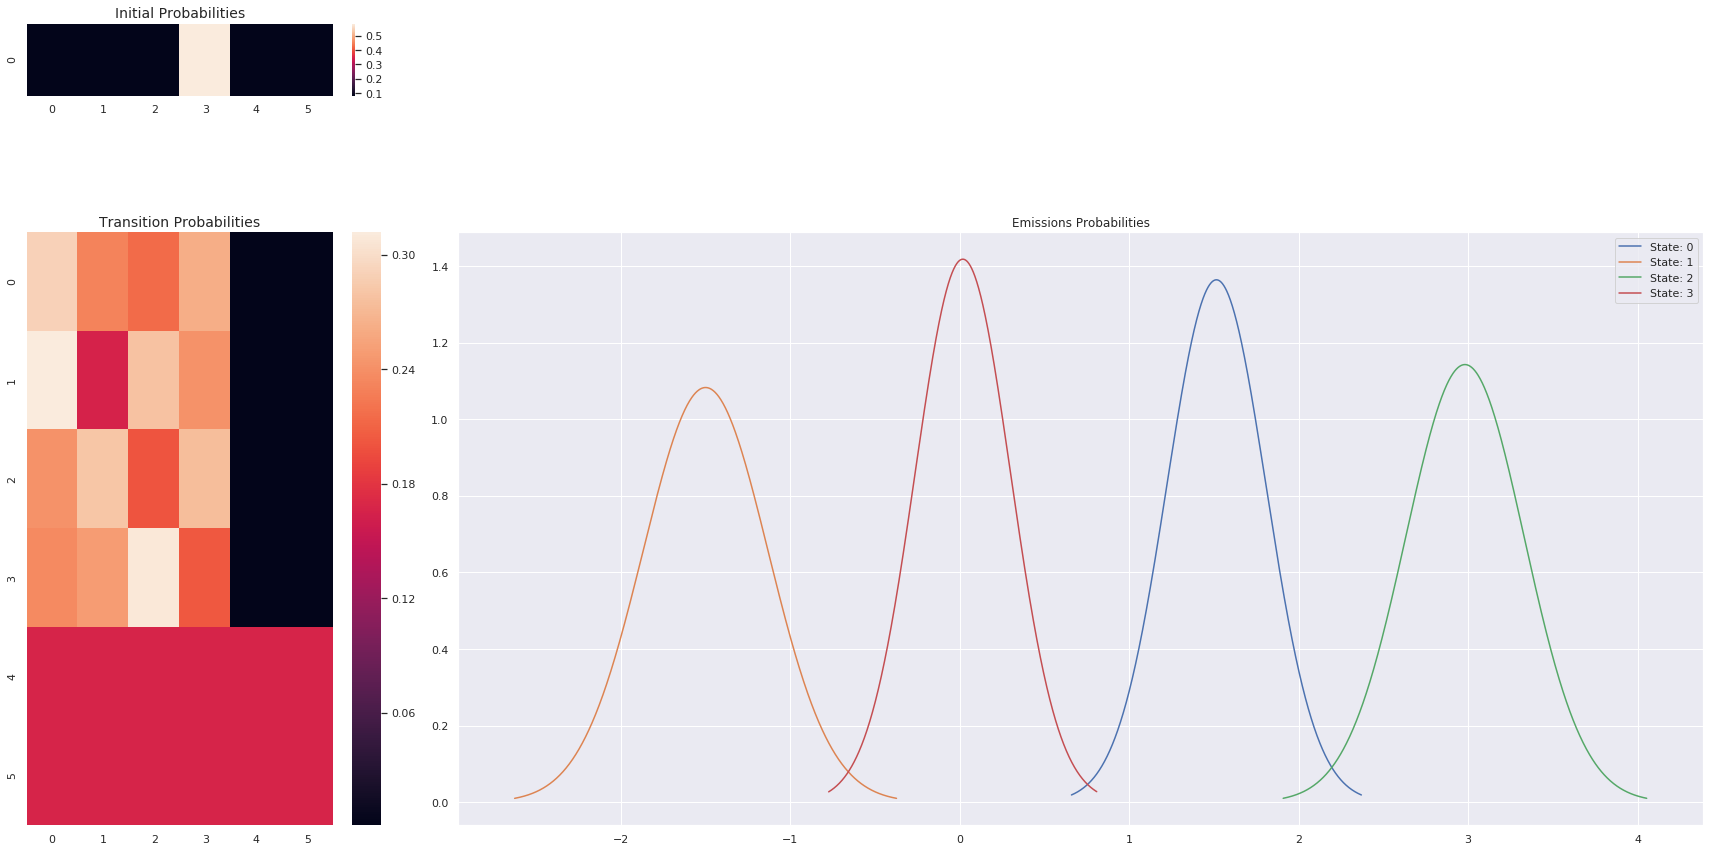

In [27]:
_ = plots.gaussian_hinton_diagram(
    informed_estimator.pi_normalized_, 
    informed_estimator.A_normalized_,
    informed_estimator.means_posterior_,
    informed_estimator.variances_posterior_
)

In [28]:
informed_estimator.A_counts_.sum(axis=1)

array([135.96060586, 116.35159008, 125.61624007, 125.07151605,
         1.00002397,   1.00002397])

In [30]:
print(informed_estimator.num_free_params())

36


In [31]:
estimator = GaussianVariationalHMM.GaussianVariationalHMM(
    n_components=7, 
    n_iterations=500, 
    n_inits=10,
    tol=1e-9,
    means_prior="uninformed",
    variances_prior="uninformed")

In [32]:
estimator.fit(observed)

GaussianVariationalHMM(A_prior=None, implementation='scaling',
            means_prior='uninformed', n_components=7, n_inits=10,
            n_iterations=500, n_jobs=-1, pi_prior=None, random_state=None,
            tol=1e-09, variances_prior='uninformed', verbose=0)

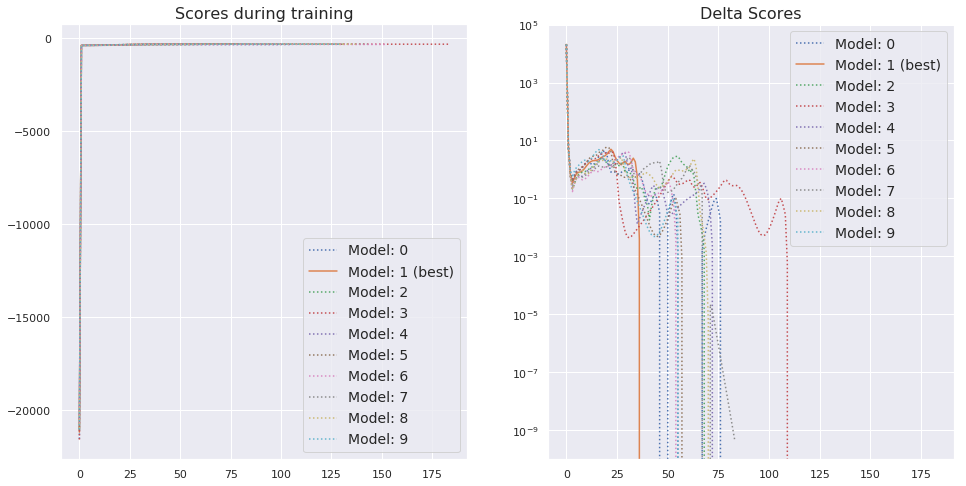

In [34]:
_ = plots.multiple_learning_plot(estimator.explored_lower_bounds_)

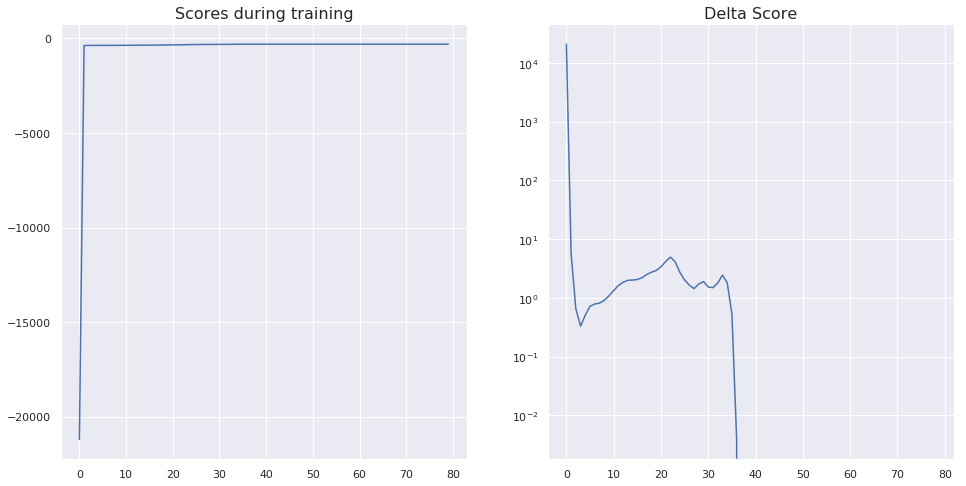

In [35]:
_ = plots.learning_plot(estimator.lower_bound_)

In [36]:
pd.Series(estimator.means_posterior_)

0      2.969
1   -0.02015
2      1.503
3     -1.509
4     0.2828
5        0.0
6        0.0
dtype: float64

In [37]:
pd.Series(estimator.variances_posterior_)

0    0.1383
1   0.04315
2   0.07944
3   0.08287
4   0.02507
5       1.0
6       1.0
dtype: float64

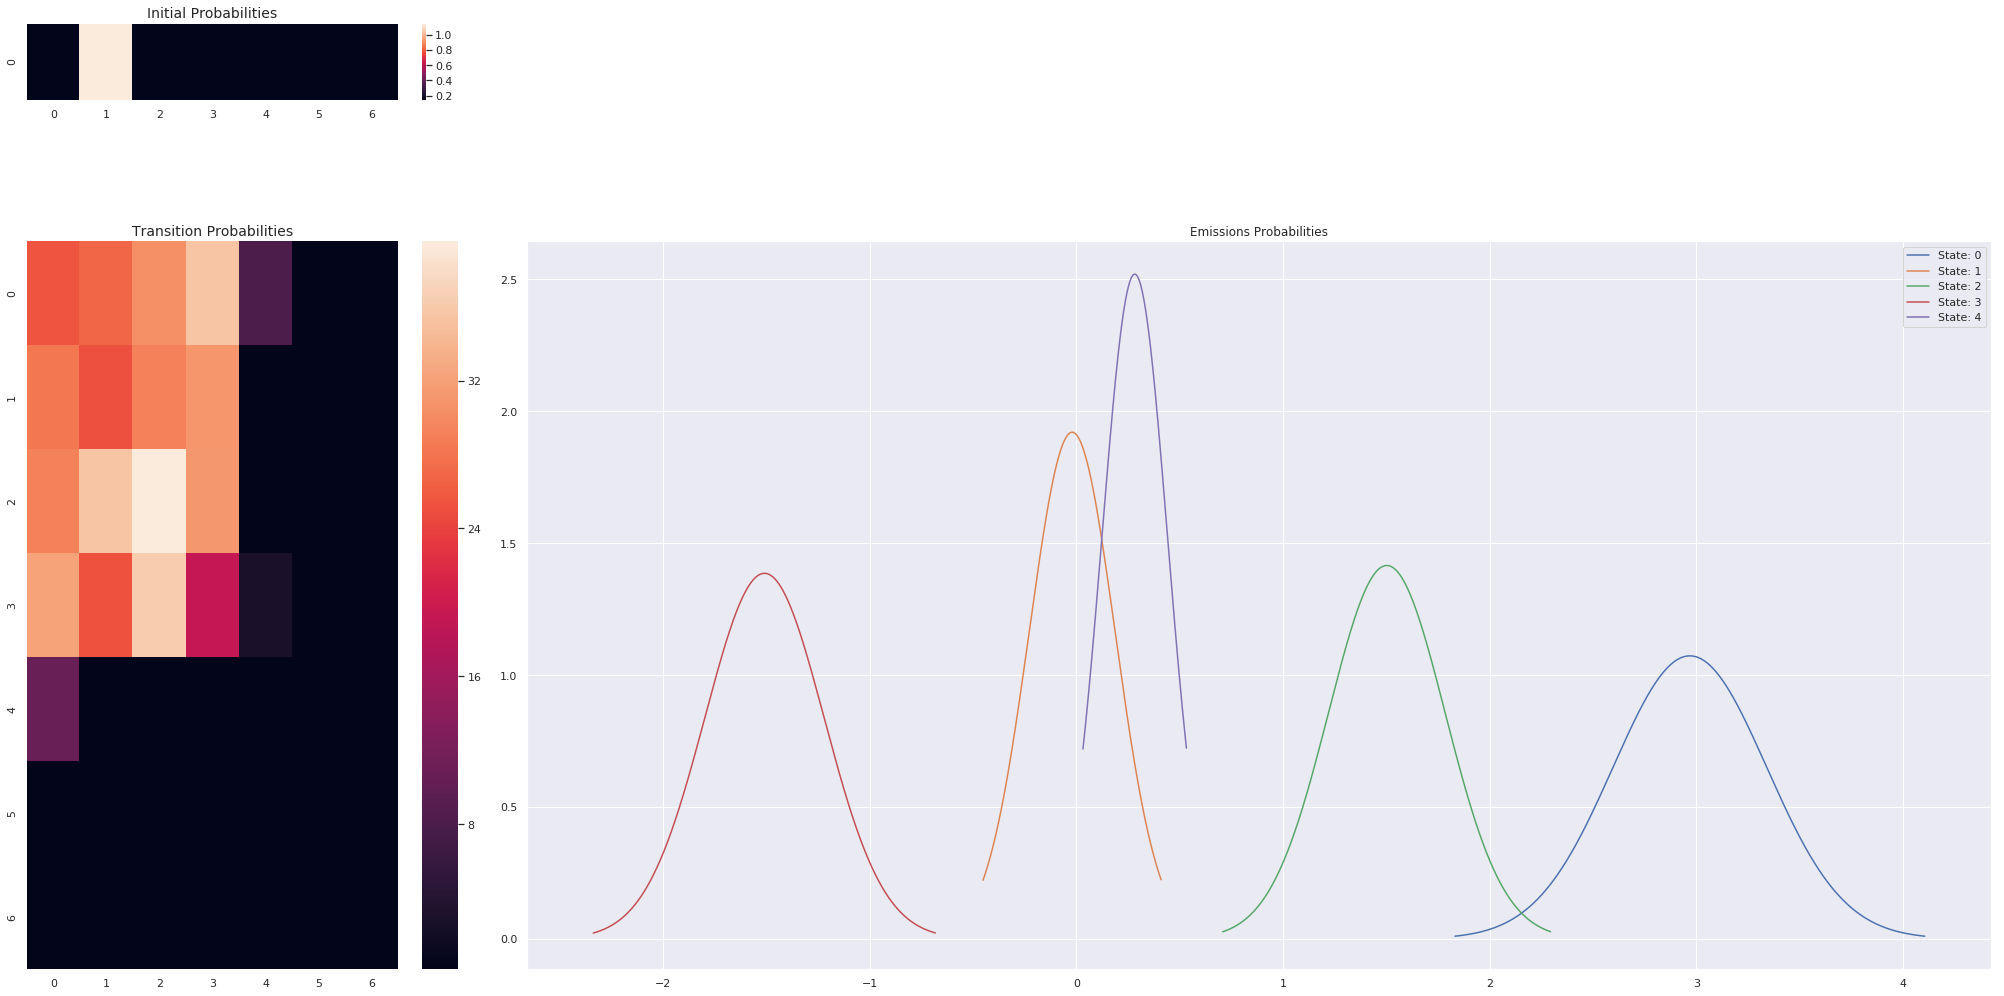

In [39]:
_ = plots.gaussian_hinton_diagram(
    estimator.pi_counts_, 
    estimator.A_counts_,
    estimator.means_posterior_,
    estimator.variances_posterior_
)

In [40]:
pd.Series(estimator.means_posterior_)

0      2.969
1   -0.02015
2      1.503
3     -1.509
4     0.2828
5        0.0
6        0.0
dtype: float64

In [41]:
pd.Series(estimator.variances_posterior_)

0    0.1383
1   0.04315
2   0.07944
3   0.08287
4   0.02507
5       1.0
6       1.0
dtype: float64

In [42]:
estimator.A_counts_.sum(axis=1)

array([126.37508587, 114.1628659 , 135.81265235, 116.0617021 ,
        11.58769377,   1.        ,   1.        ])

In [43]:
pd.DataFrame(estimator.A_counts_)

0      1      2      3      4      5      6
0  25.43  26.87  30.35  35.42  8.025 0.1429 0.1429
1  28.42  25.15  29.21  30.96 0.1434 0.1429 0.1429
2  29.24  35.47  39.55  31.12 0.1431 0.1429 0.1429
3  32.27  25.24  36.27  19.14  2.848 0.1429 0.1429
4  10.73 0.1433 0.1436 0.1436 0.1429 0.1429 0.1429
5 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429
6 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429

In [44]:
pd.Series(estimator.variances_posterior_)


0    0.1383
1   0.04315
2   0.07944
3   0.08287
4   0.02507
5       1.0
6       1.0
dtype: float64

In [45]:
estimator.score(observed)

-695.6705682242855

In [46]:
em_estimator = GaussianHMM.GaussianHMM(n_components=4, n_iterations=500)

In [47]:
em_estimator.fit(observed)

GaussianHMM(allowed_to_use_log=True, implementation='scaling',
      init_A='random', init_emissions='kmeans', init_pi='random',
      n_components=4, n_inits=1, n_iterations=500, n_jobs=-1,
      random_state=None, tol=1e-06, variance_regularization=1e-06,
      verbose=0)

In [49]:
em_estimator.score(observed)

-679.7658752009372

In [51]:
hmmlearn_estimator = hmmlearn.hmm.GaussianHMM(n_components=4, n_iter=500)

In [53]:
hmmlearn_estimator.fit(observed[0][:, None])

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=500, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [54]:
hmmlearn_estimator.score(observed[0][:, None])

-679.7661398231754

In [37]:
observed2, hidden2 = get_data4(20, 50)

In [38]:
estimator2 = GaussianVariationalHMM.GaussianVariationalHMM(
    n_components=6, 
    n_iterations=500, 
    n_inits=10,
    tol=1e-8,
    means_prior="uninformed",
    variances_prior="uninformed"
)

In [39]:
estimator2.fit(observed2)

GaussianVariationalHMM(A_prior=None, implementation='scaling',
            means_prior='uninformed', min_a_value=None, n_components=6,
            n_inits=10, n_iterations=500, n_jobs=-1, n_samples_prior=None,
            pi_prior=None, random_state=None, tol=1e-08,
            variances_prior='uninformed', verbose=0)

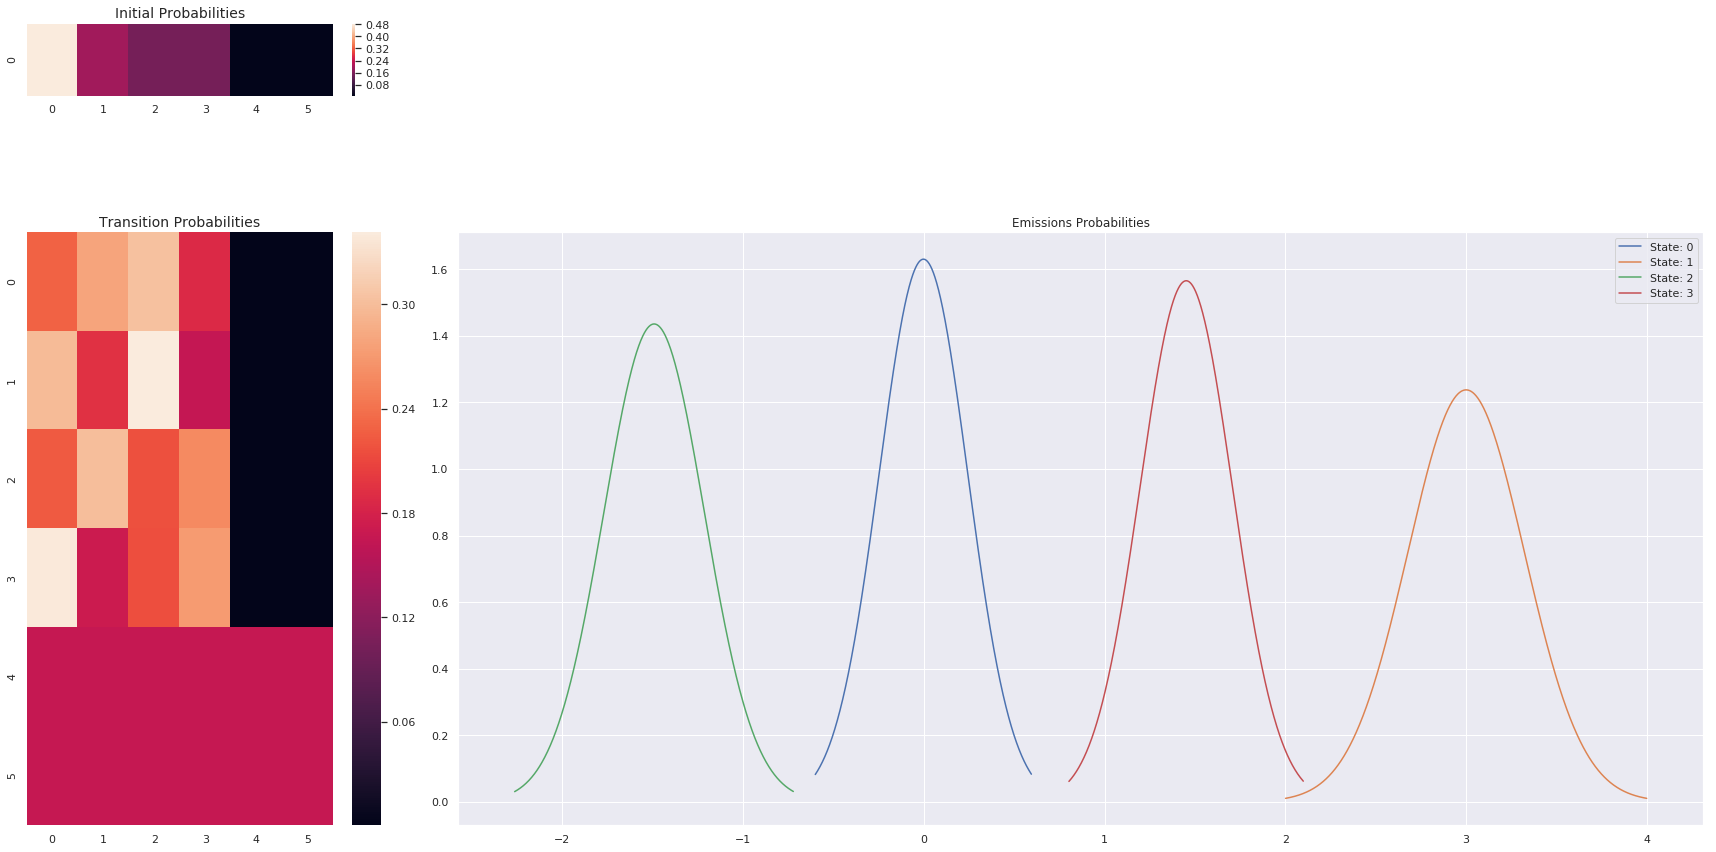

In [40]:
_ = plots.gaussian_hinton_diagram(
    estimator2.pi_normalized_, 
    estimator2.A_normalized_,
    estimator2.means_posterior_,
    estimator2.variances_posterior_
)

In [41]:
estimator2.A_counts_.sum(axis=1)

array([265.69200133, 237.18690876, 263.54347959, 217.57761032,
         1.        ,   1.        ])

In [42]:
observed3, hidden3 = get_data4(40, 50)

In [43]:
estimator3 = GaussianVariationalHMM.GaussianVariationalHMM(
    n_components=6, 
    n_iterations=500, 
    n_inits=10,
    tol=1e-10,
    means_prior="uninformed",
    variances_prior="uninformed"
)

In [44]:
estimator3.fit(observed3)

GaussianVariationalHMM(A_prior=None, implementation='scaling',
            means_prior='uninformed', min_a_value=None, n_components=6,
            n_inits=10, n_iterations=500, n_jobs=-1, n_samples_prior=None,
            pi_prior=None, random_state=None, tol=1e-10,
            variances_prior='uninformed', verbose=0)

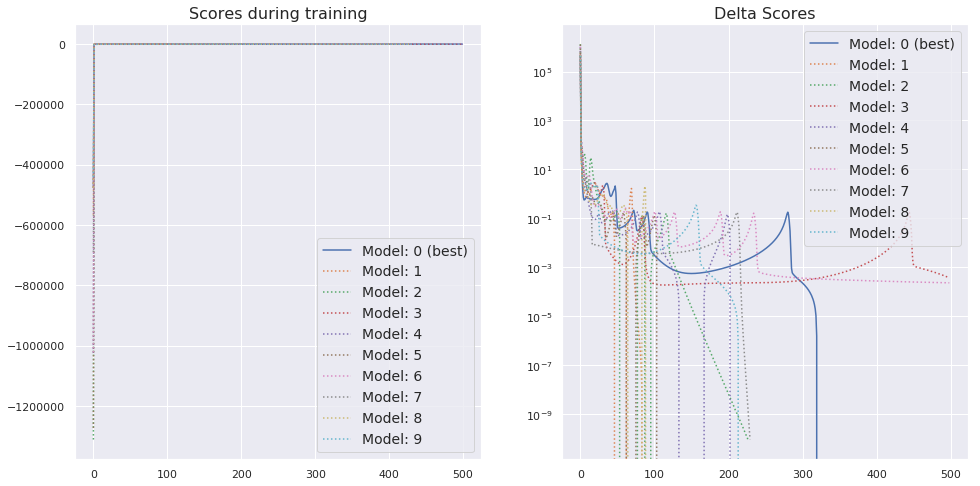

In [45]:
_ = plots.multiple_learning_plot(estimator3.explored_free_energies_)

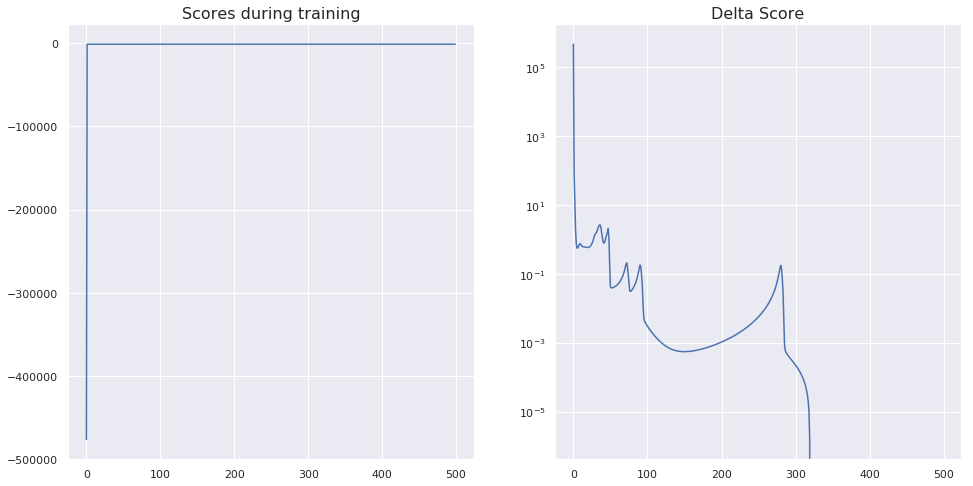

In [46]:
_ = plots.learning_plot(estimator3.lower_bound_)

In [47]:
estimator3.lower_bound_[-10:]

[-1010.2543918024137,
 -1010.25461052839,
 -1010.2548285689907,
 -1010.2550459250868,
 -1010.2552625977819,
 -1010.2554785881383,
 -1010.2556938974802,
 -1010.2559085270473,
 -1010.2561224782485,
 -1010.2563357525478]

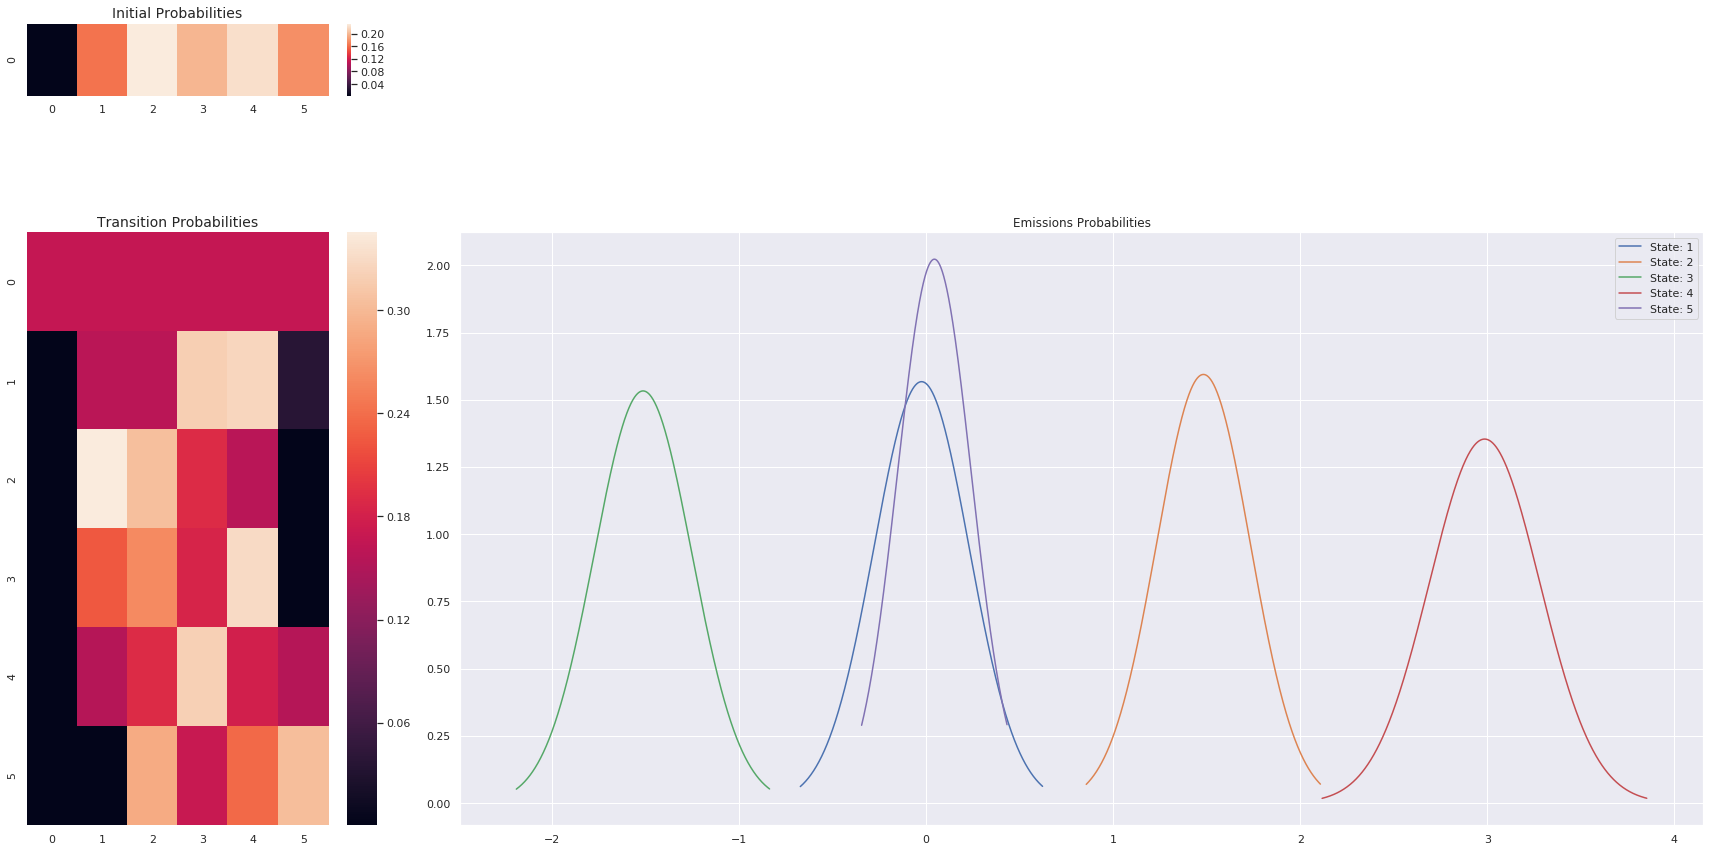

In [48]:
_ = plots.gaussian_hinton_diagram(
    estimator3.pi_normalized_, 
    estimator3.A_normalized_,
    estimator3.means_posterior_,
    estimator3.variances_posterior_
)

In [49]:
pd.DataFrame(estimator3.A_counts_)

0      1      2      3      4      5
0 0.1667 0.1667 0.1667 0.1667 0.1667 0.1667
1 0.1667  63.92  63.97  128.2  131.3   14.8
2 0.1667  160.4  141.7  88.72  73.34 0.1686
3 0.1667  108.7  126.8  89.36  159.6 0.1685
4 0.1667  74.11  91.94  153.7  85.89  73.93
5 0.1667 0.1686  38.41  22.64  31.62  40.55

In [50]:
pd.Series(np.sqrt(estimator2.variances_posterior_))

0   0.2446
1   0.3223
2   0.2778
3   0.2548
4      1.0
5      1.0
dtype: float64

In [51]:
estimator3.A_counts_.sum(axis=1)

array([  1.        , 402.37000567, 464.5015283 , 484.81491164,
       479.75472267, 133.55883172])

In [52]:
estimator3.effective_number_states()

5